In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DF basic").getOrCreate()

In [2]:
order_schema = "order_id long, order_date date, cust_id long, status string"

In [3]:
#Standard
df = spark.read \
.format("csv") \
.schema(order_schema)\
.load("D:\GKD\SPARK_HDFS\data_etc\dataBug.csv")

In [4]:
df.show()

+--------+----------+-------+---------------+
|order_id|order_date|cust_id|         status|
+--------+----------+-------+---------------+
|       1|2013-07-25|  11599|         CLOSED|
|       2|2013-07-25|    256|PENDING_PAYMENT|
|       3|2013-07-25|  12111|       COMPLETE|
|       4|2013-07-25|   8827|         CLOSED|
|       5|2013-07-25|  11318|       COMPLETE|
|       6|2013-07-25|   NULL|       COMPLETE|
|       7|2013-07-25|   4530|       COMPLETE|
|       8|2013-07-25|   2911|     PROCESSING|
|       9|2013-07-25|   NULL|PENDING_PAYMENT|
|      10|2013-07-25|   5648|PENDING_PAYMENT|
+--------+----------+-------+---------------+



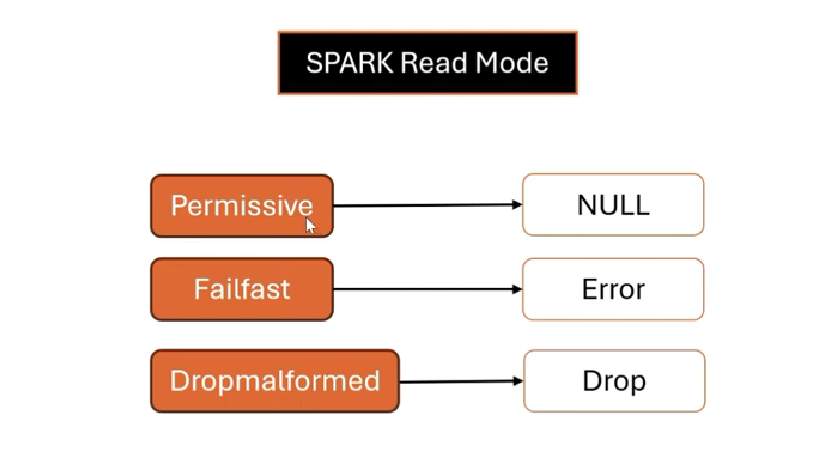

In [5]:
#Standard
df1 = spark.read \
.format("csv") \
.schema(order_schema)\
.option("mode", "permissive") \
.load("D:\GKD\SPARK_HDFS\data_etc\dataBug.csv")

In [6]:
df1.show()

+--------+----------+-------+---------------+
|order_id|order_date|cust_id|         status|
+--------+----------+-------+---------------+
|       1|2013-07-25|  11599|         CLOSED|
|       2|2013-07-25|    256|PENDING_PAYMENT|
|       3|2013-07-25|  12111|       COMPLETE|
|       4|2013-07-25|   8827|         CLOSED|
|       5|2013-07-25|  11318|       COMPLETE|
|       6|2013-07-25|   NULL|       COMPLETE|
|       7|2013-07-25|   4530|       COMPLETE|
|       8|2013-07-25|   2911|     PROCESSING|
|       9|2013-07-25|   NULL|PENDING_PAYMENT|
|      10|2013-07-25|   5648|PENDING_PAYMENT|
+--------+----------+-------+---------------+



In [7]:
#Standard
df2 = spark.read \
.format("csv") \
.schema(order_schema)\
.option("mode", "failfast") \
.load("D:\GKD\SPARK_HDFS\data_etc\dataBug.csv")

In [8]:
# có lỗi vì ở trên có "failfast" sẽ bắt lỗi các data pyte sai
df2.show()

Py4JJavaError: An error occurred while calling o53.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2.0 failed 1 times, most recent failure: Lost task 0.0 in stage 2.0 (TID 2) (PHI-THUAN executor driver): org.apache.spark.SparkException: [MALFORMED_RECORD_IN_PARSING.WITHOUT_SUGGESTION] Malformed records are detected in record parsing: [6,15911,null,COMPLETE].
Parse Mode: FAILFAST. To process malformed records as null result, try setting the option 'mode' as 'PERMISSIVE'. 
	at org.apache.spark.sql.errors.QueryExecutionErrors$.malformedRecordsDetectedInRecordParsingError(QueryExecutionErrors.scala:1610)
	at org.apache.spark.sql.catalyst.util.FailureSafeParser.parse(FailureSafeParser.scala:79)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser$.$anonfun$parseIterator$2(UnivocityParser.scala:456)
	at scala.collection.Iterator$$anon$11.nextCur(Iterator.scala:486)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:492)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: org.apache.spark.sql.catalyst.util.BadRecordException: java.lang.NumberFormatException: For input string: "error"
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.org$apache$spark$sql$catalyst$csv$UnivocityParser$$convert(UnivocityParser.scala:365)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$parse$2(UnivocityParser.scala:307)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser$.$anonfun$parseIterator$1(UnivocityParser.scala:452)
	at org.apache.spark.sql.catalyst.util.FailureSafeParser.parse(FailureSafeParser.scala:60)
	... 26 more
Caused by: java.lang.NumberFormatException: For input string: "error"
	at java.base/java.lang.NumberFormatException.forInputString(NumberFormatException.java:65)
	at java.base/java.lang.Long.parseLong(Long.java:692)
	at java.base/java.lang.Long.parseLong(Long.java:817)
	at scala.collection.immutable.StringLike.toLong(StringLike.scala:315)
	at scala.collection.immutable.StringLike.toLong$(StringLike.scala:315)
	at scala.collection.immutable.StringOps.toLong(StringOps.scala:33)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$makeConverter$8(UnivocityParser.scala:192)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$makeConverter$8$adapted(UnivocityParser.scala:192)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.nullSafeDatum(UnivocityParser.scala:291)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$makeConverter$7(UnivocityParser.scala:192)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.org$apache$spark$sql$catalyst$csv$UnivocityParser$$convert(UnivocityParser.scala:346)
	... 29 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: org.apache.spark.SparkException: [MALFORMED_RECORD_IN_PARSING.WITHOUT_SUGGESTION] Malformed records are detected in record parsing: [6,15911,null,COMPLETE].
Parse Mode: FAILFAST. To process malformed records as null result, try setting the option 'mode' as 'PERMISSIVE'. 
	at org.apache.spark.sql.errors.QueryExecutionErrors$.malformedRecordsDetectedInRecordParsingError(QueryExecutionErrors.scala:1610)
	at org.apache.spark.sql.catalyst.util.FailureSafeParser.parse(FailureSafeParser.scala:79)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser$.$anonfun$parseIterator$2(UnivocityParser.scala:456)
	at scala.collection.Iterator$$anon$11.nextCur(Iterator.scala:486)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:492)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: org.apache.spark.sql.catalyst.util.BadRecordException: java.lang.NumberFormatException: For input string: "error"
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.org$apache$spark$sql$catalyst$csv$UnivocityParser$$convert(UnivocityParser.scala:365)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$parse$2(UnivocityParser.scala:307)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser$.$anonfun$parseIterator$1(UnivocityParser.scala:452)
	at org.apache.spark.sql.catalyst.util.FailureSafeParser.parse(FailureSafeParser.scala:60)
	... 26 more
Caused by: java.lang.NumberFormatException: For input string: "error"
	at java.base/java.lang.NumberFormatException.forInputString(NumberFormatException.java:65)
	at java.base/java.lang.Long.parseLong(Long.java:692)
	at java.base/java.lang.Long.parseLong(Long.java:817)
	at scala.collection.immutable.StringLike.toLong(StringLike.scala:315)
	at scala.collection.immutable.StringLike.toLong$(StringLike.scala:315)
	at scala.collection.immutable.StringOps.toLong(StringOps.scala:33)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$makeConverter$8(UnivocityParser.scala:192)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$makeConverter$8$adapted(UnivocityParser.scala:192)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.nullSafeDatum(UnivocityParser.scala:291)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.$anonfun$makeConverter$7(UnivocityParser.scala:192)
	at org.apache.spark.sql.catalyst.csv.UnivocityParser.org$apache$spark$sql$catalyst$csv$UnivocityParser$$convert(UnivocityParser.scala:346)
	... 29 more


In [ ]:
#Standard
df3 = spark.read \
.format("csv") \
.schema(order_schema)\
.option("mode", "dropmalformed") \
.load("D:\GKD\SPARK_HDFS\data_etc\dataBug.csv")

In [ ]:
# dropmalformed sẽ xóa đi các hàng bị lỗi
df3.show()

+--------+----------+-------+---------------+
|order_id|order_date|cust_id|         status|
+--------+----------+-------+---------------+
|       1|2013-07-25|  11599|         CLOSED|
|       2|2013-07-25|    256|PENDING_PAYMENT|
|       3|2013-07-25|  12111|       COMPLETE|
|       4|2013-07-25|   8827|         CLOSED|
|       5|2013-07-25|  11318|       COMPLETE|
|       7|2013-07-25|   4530|       COMPLETE|
|       8|2013-07-25|   2911|     PROCESSING|
|      10|2013-07-25|   5648|PENDING_PAYMENT|
+--------+----------+-------+---------------+

